<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week4/RNN_GRU_LSTM_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model RNN, GRU, dan LSTM Menggunakan TensorFlow🚀**

## **Mengimpor Library**

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Mengimpor dataset IMDB
num_words = 50000  # Sesuaikan dengan rentang yang diminta
maxlen = 500  # Panjang input antara 300-500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Padding agar panjang input menjadi maxlen
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


## RNN MODEL


In [10]:
model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

## GRU MODEL

In [11]:
model_gru = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    GRU(128, return_sequences=True),
    Dropout(0.2),
    GRU(64),
    Dense(1, activation='sigmoid')
])

# LSTM MODEL

In [12]:
model_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

## Train Model

In [13]:
# Kompilasi model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Melatih model
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
history_gru = model_gru.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 308s 773ms/step - accuracy: 0.5105 - loss: 0.7067 - val_accuracy: 0.5034 - val_loss: 0.6941
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 320s 771ms/step - accuracy: 0.5067 - loss: 0.7001 - val_accuracy: 0.5191 - val_loss: 0.6938
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 321s 767ms/step - accuracy: 0.5265 - loss: 0.6911 - val_accuracy: 0.5748 - val_loss: 0.6716
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 322s 769ms/step - accuracy: 0.6449 - loss: 0.6327 - val_accuracy: 0.6020 - val_loss: 0.6797
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 297s 760ms/step - accuracy: 0.7309 - loss: 0.5380 - val_accuracy: 0.7820 - val_loss: 0.4955
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 938s 2s/step - accuracy: 0.6978 - loss: 0.5557 - val_accuracy: 0.7483 - val_loss: 0.5092
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 953s 2s/step - accuracy: 0.7939 - loss: 0.4471 - val_accuracy: 0.8484 - val_loss: 0.3573
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 938s 2s/step - accuracy: 0.9170 - loss: 0.2133 - v

## Evaluate

In [15]:
# Prediksi untuk evaluasi
y_pred_rnn = model_rnn.predict(x_test)
y_pred_gru = model_gru.predict(x_test)
y_pred_lstm = model_lstm.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 189ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 251s 320ms/step


In [16]:
# Menghitung Confusion Matrix untuk RNN, GRU, dan LSTM
cm_rnn = confusion_matrix(y_test, y_pred_rnn.round())
cm_gru = confusion_matrix(y_test, y_pred_gru.round())
cm_lstm = confusion_matrix(y_test, y_pred_lstm.round())

In [17]:
# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

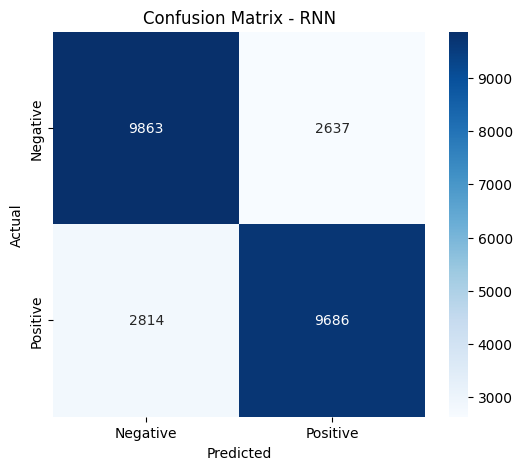

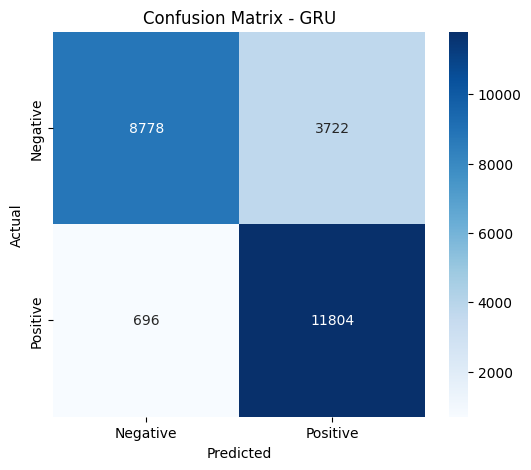

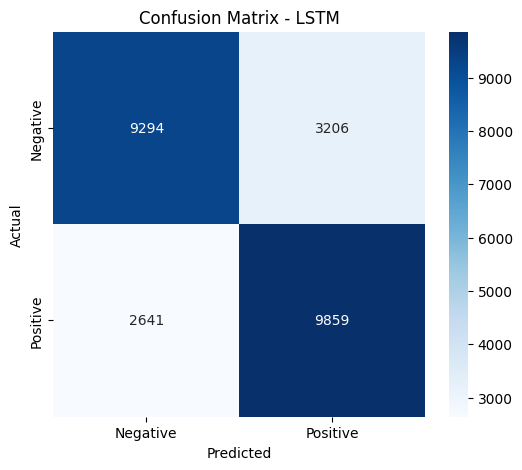

In [18]:
# Menampilkan Confusion Matrix untuk setiap model
plot_confusion_matrix(cm_rnn, "RNN")
plot_confusion_matrix(cm_gru, "GRU")
plot_confusion_matrix(cm_lstm, "LSTM")

In [19]:
# Menampilkan Classification Report (Akurasi, Presisi, Recall, F1-Score)
print("RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn.round()))


RNN Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78     12500
           1       0.79      0.77      0.78     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



In [20]:
print("GRU Classification Report:")
print(classification_report(y_test, y_pred_gru.round()))


GRU Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     12500
           1       0.76      0.94      0.84     12500

    accuracy                           0.82     25000
   macro avg       0.84      0.82      0.82     25000
weighted avg       0.84      0.82      0.82     25000



In [21]:
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm.round()))


LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     12500
           1       0.75      0.79      0.77     12500

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



In [24]:
from sklearn.metrics import roc_curve, auc

# Menghitung AUC dan ROC curve
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn)
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)

roc_auc_rnn = auc(fpr_rnn, tpr_rnn)
roc_auc_gru = auc(fpr_gru, tpr_gru)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)


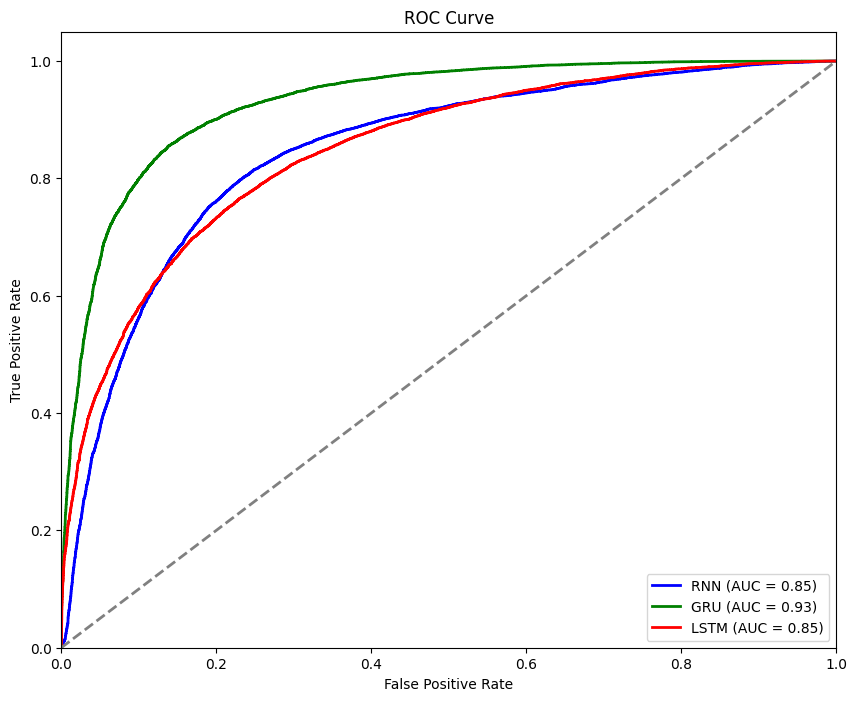

In [25]:
# Visualisasi ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rnn, tpr_rnn, color='blue', lw=2, label=f'RNN (AUC = {roc_auc_rnn:.2f})')
plt.plot(fpr_gru, tpr_gru, color='green', lw=2, label=f'GRU (AUC = {roc_auc_gru:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='red', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Perbandingan

In [32]:
import matplotlib.pyplot as plt
import numpy as np


# Mengambil akurasi dan AUC dari history objek
accuracy_rnn = history_rnn.history['accuracy'][-1]  # Akurasi dari model RNN
accuracy_gru = history_gru.history['accuracy'][-1]  # Akurasi dari model GRU
accuracy_lstm = history_lstm.history['accuracy'][-1]  # Akurasi dari model LSTM


In [35]:
# Membuat subplot untuk perbandingan Akurasi dan AUC
models = ['RNN', 'GRU', 'LSTM']
accuracies = [accuracy_rnn, accuracy_gru, accuracy_lstm]


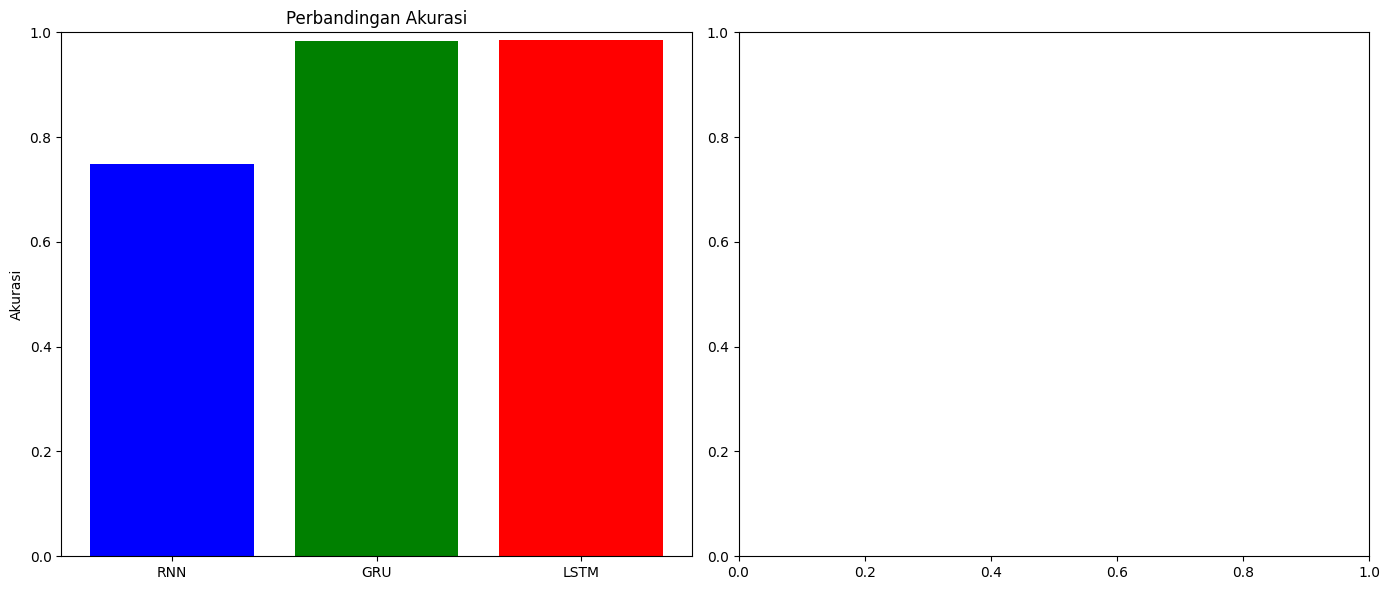

In [38]:
# Plotting the comparison of Accuracy and AUC
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy
ax[0].bar(models, accuracies, color=['blue', 'green', 'red'])
ax[0].set_title('Perbandingan Akurasi')
ax[0].set_ylabel('Akurasi')
ax[0].set_ylim([0, 1])


# Menampilkan diagram
plt.tight_layout()
plt.show()